In [1]:
!pip install -U --pre tensorflow=="2.2.0"

  Using cached https://files.pythonhosted.org/packages/4c/1a/0d79814736cfecc825ab8094b39648cc9c46af7af1bae839928acb73b4dd/tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: tf-models-official 2.5.0 has requirement tensorflow>=2.5.0, but you'll have tensorflow 2.2.0 which is incompatible.
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [2]:
pip install tensorflow_gpu=="2.2.0"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def getFileCounts(folder):
    files = os.listdir(folder)
    count = 0
    for file in files:
        count += 1
    return count

In [ ]:
import os

In [ ]:
getFileCounts('MyDrive/CS2/TensorFlow/workspace/training_demo/images/train')

22520

In [2]:
%cd drive

/content/drive


In [3]:
ls

MyDrive/


In [4]:
cd MyDrive/CS2/TensorFlow/models/research/

/content/drive/MyDrive/CS2/TensorFlow/models/research


In [7]:
pip install avro-python3==1.8.1

In [8]:
pip install folium==0.2.1

In [9]:
pip install gast==0.3.3

In [10]:
pip install h5py==2.10.0

In [11]:
pip install tensorboard==2.2.0

In [12]:
pip install tensorflow-estimator==2.2.0

In [13]:
pip install dill==0.3.4

In [14]:
pip install requests==2.23.0

In [5]:
# Install the Object Detection API
%%bash
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/drive/MyDrive/CS2/TensorFlow/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=21863469 sha256=1717ecf5be6d327d6d7a50a5902a026f4f8f76b2497b65e05143215eb1d9aebe
  Stored in directory: /tmp/pip-ephem-wheel-cache-6s4gofg4/wheels/d9/a7/e3/2e15803b4b4183e1f0cf64124d3ccdd3a8a01c019435242070
Successfully built object-detection
  Found existing installation: object-detection 0.1
    Can't uninstall 'object-detection'. No files were found to uninstall.


In [6]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [7]:
import os
import sys
os.environ['PYTHONPATH']+=":/content/drive/MyDrive/CS2/TensorFlow/models"
sys.path.append("/content/drive/MyDrive/CS2/TensorFlow/models/research")

In [8]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> 

In [ ]:
ls

adversarial_text/    delf/                       pcl_rl/
attention_ocr/       dist/                       README.md
audioset/            efficient-hrl/              rebar/
autoaugment/         lfads/                      seq_flow_lite/
build/               lstm_object_detection/      setup.py
cognitive_planning/  marco/                      slim/
cvt_text/            nst_blogpost/               vid2depth/
deeplab/             object_detection/
deep_speech/         object_detection.egg-info/


In [9]:
cd object_detection/builders/

/content/drive/My Drive/CS2/TensorFlow/models/research/object_detection/builders


In [10]:
#cd into 'TensorFlow/models/research/object_detection/builders/'

!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

2021-06-24 10:41:06.075138: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-24 10:41:08.494235: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-24 10:41:08.524435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-24 10:41:08.525034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-24 10:41:08.525075: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

In [ ]:
%cd '/content/drive/MyDrive/CS2/TensorFlow/scripts/preprocessing'

/content/drive/MyDrive/CS2/TensorFlow/scripts/preprocessing


In [ ]:
#cd into preprocessing directory
#%cd '/content/gdrive/My Drive/TensorFlow/scripts/preprocessing'
#run the cell to generate test.record and train.record
!python generate_tfrecords.py -x '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/images/train' -l '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/annotations/train.record'
!python generate_tfrecords.py -x '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/images/test' -l '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/annotations/test.record'
# !python generate_tfrecord.py -x '[path_to_train_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/train.record'
# !python generate_tfrecord.py -x '[path_to_test_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/test.record'

Traceback (most recent call last):
  File "generate_tfrecords.py", line 172, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecords.py", line 162, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecords.py", line 136, in create_tf_example
    classes.append(class_text_to_int(row['class']))
  File "generate_tfrecords.py", line 105, in class_text_to_int
    return label_map_dict[row_label]
KeyError: 'D01'
Successfully created the TFRecord file: /content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/annotations/test.record


In [11]:
%cd '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo'

/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo


In [12]:
%load_ext tensorboard
%tensorboard --logdir='/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/models/efficientdet_d3'


Reusing TensorBoard on port 6006 (pid 730), started 1:37:28 ago. (Use '!kill 730' to kill it.)

<IPython.core.display.Javascript object>

In [14]:
!pip install tf-models-officials

ERROR: Could not find a version that satisfies the requirement tf-models-officials (from versions: none)
ERROR: No matching distribution found for tf-models-officials


In [15]:
!pip install tf-slim

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [1]:
!python /content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/model_main_tf2.py --model_dir=/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/models/efficientdet_d3 --pipeline_config_path=/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/models/efficientdet_d3/pipeline.config

2021-06-24 10:56:08.814942: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-24 10:56:15.486359: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-24 10:56:15.549409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-24 10:56:15.550040: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-24 10:56:15.550085: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-24 10:56:15.649460: I tensorflow/stream_executor/platform/default

scripts/  workspace/


In [ ]:
%cd workspace/training_demo/pre-trained-models/

/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/pre-trained-models


In [ ]:
!wget 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d3_coco17_tpu-32.tar.gz'

--2021-06-18 12:41:25--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d3_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.11.128, 2607:f8b0:400c:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.11.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92858658 (89M) [application/x-tar]
Saving to: ‘efficientdet_d3_coco17_tpu-32.tar.gz’

efficientdet_d3_coc 100%[===================>]  88.56M  59.9MB/s    in 1.5s    

2021-06-18 12:41:26 (59.9 MB/s) - ‘efficientdet_d3_coco17_tpu-32.tar.gz’ saved [92858658/92858658]



In [ ]:
!tar -xzvf 'efficientdet_d3_coco17_tpu-32.tar.gz'

efficientdet_d3_coco17_tpu-32/
efficientdet_d3_coco17_tpu-32/checkpoint/
efficientdet_d3_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d3_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d3_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d3_coco17_tpu-32/pipeline.config
efficientdet_d3_coco17_tpu-32/saved_model/
efficientdet_d3_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d3_coco17_tpu-32/saved_model/assets/
efficientdet_d3_coco17_tpu-32/saved_model/variables/
efficientdet_d3_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d3_coco17_tpu-32/saved_model/variables/variables.index


In [ ]:
%cd ..

/content/drive/My Drive/CS2/TensorFlow/workspace/training_demo


In [ ]:
cd ..

/content/drive/My Drive/CS2/TensorFlow/workspace


In [ ]:
cd ..

/content/drive/My Drive/CS2/TensorFlow


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 57660, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 57660 (delta 36), reused 20 (delta 0), pack-reused 57602
Receiving objects: 100% (57660/57660), 572.87 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (40009/40009), done.
Checking out files: 100% (2496/2496), done.


In [ ]:
%cd models


/content/drive/My Drive/CS2/TensorFlow/models


In [ ]:
!git checkout -f e04dafd04d69053d3733bb91d47d0d95bc2c8199

fatal: reference is not a tree: e04dafd04d69053d3733bb91d47d0d95bc2c8199


In [ ]:
!apt-get install protobuf-compiler python-lxml python-pil


Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [30]:
!pip install Cython pandas tf-slim lvis

In [ ]:
%cd research/

/content/drive/My Drive/CS2/TensorFlow/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/TensorFlow/models"
sys.path.append("/content/gdrive/My Drive/TensorFlow/models/research")

In [ ]:
!python setup.py build

python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
ls

adversarial_text/    deeplab/                marco/             seq_flow_lite/
attention_ocr/       deep_speech/            nst_blogpost/      slim/
audioset/            delf/                   object_detection/  vid2depth/
autoaugment/         efficient-hrl/          pcl_rl/
cognitive_planning/  lfads/                  README.md
cvt_text/            lstm_object_detection/  rebar/


In [ ]:
cd ..

/


In [ ]:
!git checkout -f e04dafd04d69053d3733bb91d47d0d95bc2c8199

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!pip install -U --pre tensorflow=="2.2.0"

     |████████████████████████████████| 516.2MB 33kB/s 
     |████████████████████████████████| 2.9MB 32.8MB/s 
     |████████████████████████████████| 3.0MB 19.1MB/s 
     |████████████████████████████████| 460kB 25.8MB/s 
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

bash: line 1: cd: models/research/: No such file or directory
object_detection/protos/*.proto: No such file or directory
cp: cannot stat 'object_detection/packages/tf2/setup.py': No such file or directory
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [5]:
cd /content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo

/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo


In [6]:
ls

annotations/      exporter_main_v2.py  model_main_tf2.py  pre-trained-models/
exported-models/  images/              models/            saved/


In [7]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/efficientdet_d3/pipeline.config --trained_checkpoint_dir ./models/efficientdet_d3/ --output_directory ./exported-models/my_model

2021-06-24 15:23:42.957898: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-24 15:23:44.777811: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-24 15:23:44.805375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-24 15:23:44.805992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-24 15:23:44.806034: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-24 15:23:44.809042: I tensorflow/stream_executor/platform/default

In [8]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vz_utils

PATH_TO_SAVED_MODEL = '/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/exported-models/my_model/saved_model'

print('loading model...', end = '')

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

loading model...

Done!


In [9]:
category_index = label_map_util.create_categories_from_labelmap('/content/drive/MyDrive/CS2/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt', use_display_name=True)

In [10]:
img = ['/content/drive/MyDrive/CS2/Czech_000004.jpg', '/content/drive/MyDrive/CS2/Czech_000026.jpg', '/content/drive/MyDrive/CS2/Czech_000094.jpg',
          '/content/drive/MyDrive/CS2/Czech_000396.jpg']

running inference for /content/drive/MyDrive/CS2/Czech_000004.jpg... DONE!


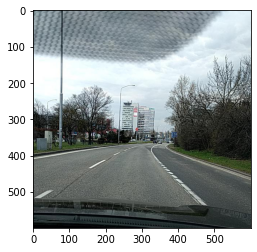

running inference for /content/drive/MyDrive/CS2/Czech_000026.jpg... DONE!


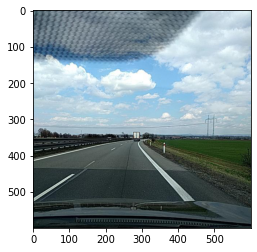

running inference for /content/drive/MyDrive/CS2/Czech_000094.jpg... DONE!


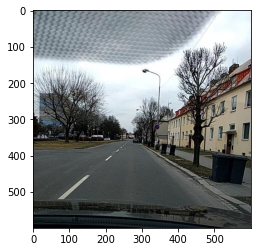

running inference for /content/drive/MyDrive/CS2/Czech_000396.jpg... DONE!


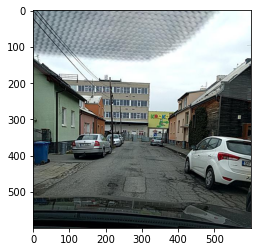

In [13]:
import numpy as np
from PIL import Image
from object_detection.utils import visualization_utils as viz_utils
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
  return np.array(Image.open(path))

for image_path in img:
  print('running inference for {}... '.format(image_path), end='')
  image_np = load_image_into_numpy_array(image_path)
  input_tensor= tf.convert_to_tensor(image_np)
  input_tensor = input_tensor[tf.newaxis, ...]
  detections = detect_fn(input_tensor)
  num_detections = int(detections.pop('num_detections'))
  detections = {key:value[0,:num_detections].numpy() for key,value in detections.items()}
  detections['num_detections'] = num_detections

  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_np_with_detections = image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates = True,
      max_boxes_to_draw = 100,
      min_score_thresh=.5,
      agnostic_mode=False
  )

  %matplotlib inline
  plt.figure()
  plt.imshow(image_np_with_detections)
  print('DONE!')
  plt.show()